In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Carregando os dados gerados pelo app.py
df_clientes = pd.read_csv('clientes.csv')
df_status = pd.read_csv('status_credito.csv')

In [25]:
# Diagnóstico de nomes de colunas
print(f"Colunas Clientes: {df_clientes.columns.tolist()}")
print(f"Colunas Status: {df_status.columns.tolist()}")

Colunas Clientes: ['id_cliente', 'nome', 'idade', 'renda_mensal', 'score_serasa_base', 'data_adesao', 'regiao_geografica']
Colunas Status: ['id_cliente', 'tem_divida_ativa', 'dias_atraso', 'valor_devido', 'target_inadimplente']


In [26]:
# Unindo as tabelas através do id_cliente
df_analise = pd.merge(df_clientes, df_status, on='id_cliente')

if df_analise.empty:
    print("❌ O merge falhou. Verifique se os IDs no arquivo 'status_credito.csv' realmente existem em 'clientes.csv'.")
    # Exibe os 2 primeiros IDs de cada para comparar visualmente
    print(f"Exemplo ID Cliente: {df_clientes['id_cliente'].iloc[0]}")
    print(f"Exemplo ID Status: {df_status['id_cliente'].iloc[0]}")
else:
    print(f"✅ Sucesso! {len(df_analise)} linhas combinadas.")

✅ Sucesso! 220 linhas combinadas.


#### **1. Qual a média de renda dos inadimplentes vs. adimplentes?**

In [31]:
media_renda = df_analise.groupby('target_inadimplente')['renda_mensal'].mean()
print(f"Média de renda (Adimplentes): R$ {media_renda[0]:.2f}")
print(f"Média de renda (Inadimplentes): R$ {media_renda[1]:.2f}")

Média de renda (Adimplentes): R$ 14349.87
Média de renda (Inadimplentes): R$ 9899.93


#### **2. Relação entre Score Serasa e Inadimplência**

In [34]:
inadimplencia_por_score = df_analise.groupby(
    pd.cut(df_analise['score_serasa_base'], bins=[0, 500, 1000]), 
    observed=False
)['target_inadimplente'].mean()

print("Taxa de Inadimplência por Faixa de Score:")
print(inadimplencia_por_score)

Taxa de Inadimplência por Faixa de Score:
score_serasa_base
(0, 500]       0.833333
(500, 1000]    0.105263
Name: target_inadimplente, dtype: float64


A taxa de inadimplência de ~83% para scores baixos versus ~10% para scores altos!!!!

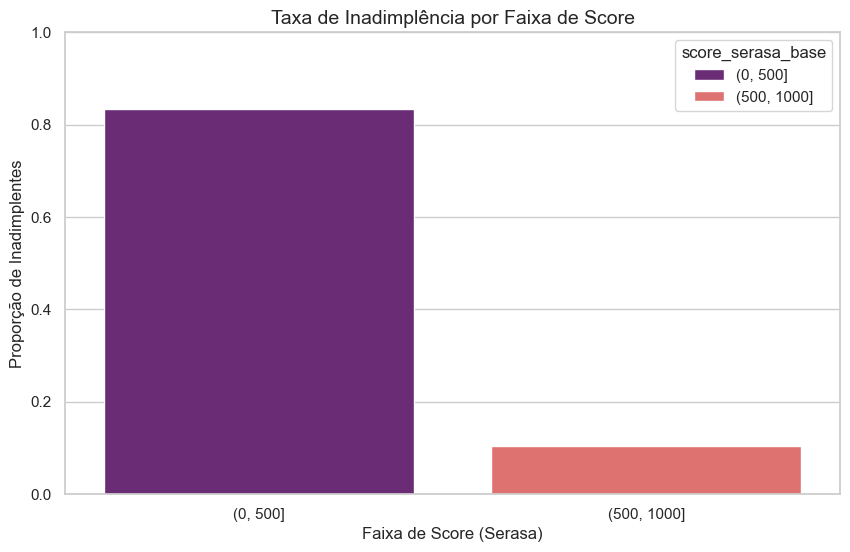

In [49]:
# Resetando o índice para facilitar o plot
plot_data = inadimplencia_por_score.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='score_serasa_base', y='target_inadimplente', hue='score_serasa_base', palette='magma')

plt.title('Taxa de Inadimplência por Faixa de Score', fontsize=14)
plt.ylabel('Proporção de Inadimplentes', fontsize=12)
plt.xlabel('Faixa de Score (Serasa)', fontsize=12)
plt.ylim(0, 1) 

plt.savefig('credit_risk_analysis.png', dpi=300, bbox_inches='tight')

plt.show()

#### **3. Distribuição Geográfica do Risco**

In [33]:
risco_regional = df_analise.groupby('regiao_geografica')['target_inadimplente'].sum().sort_values(ascending=False)
print("\nVolume de inadimplentes por região:")
print(risco_regional)


Volume de inadimplentes por região:
regiao_geografica
RS    12
BA     8
MG     8
RJ     7
PR     6
SP     4
Name: target_inadimplente, dtype: int64


A região RS apresenta o maior volume absoluto de inadimplentes no simulador, o que poderia gerar discussões sobre fatores macroeconômicos regionais em um cenário real!!!